# A first try at reading and analyzing the DVSGesture dataset.

In [ ]:
pip install tonic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.3 MB/s eta 0:00:00


Import the necessary libraries - most importantly Tonic, which provides access to public event-based vision and audio datasets

In [ ]:
import tonic
import tonic.transforms as TT
import torch
from torch.nn import functional as F
from torch.utils.data import DataLoader

Download the DVSGesture dataset

In [ ]:
dataset = tonic.datasets.DVSGesture(save_to='./data', train=True)

  0%|          | 0/2443675558 [00:00<?, ?it/s]

Extracting ./data/DVSGesture/ibmGestureTrain.tar.gz to ./data/DVSGesture


In [ ]:
len(dataset)

1077

In [ ]:
events, label = dataset[0]
events

array([(45,  64,  True,       1), (31,  62, False,       5),
       (45, 126, False,      21), ..., (39,  60,  True, 5722861),
       (40,  60, False, 5722874), (50,  62, False, 5722890)],
      dtype=[('x', '<i2'), ('y', '<i2'), ('p', '?'), ('t', '<i8')])

In [ ]:
dataset.sensor_size

(128, 128, 2)

# Applying different tranformations and visualizations on the data

1. ToFrame: creates dense frames by binning them - three approaches
  - with time_window
  - with spike_count
  - with n_time_bins

In [1]:
transform_time_window = TT.ToFrame(
    sensor_size=dataset.sensor_size,
    time_window=1000,
)

frames = transform_time_window(events)
frames.shape

NameError: name 'TT' is not defined

In [ ]:
from IPython.display import HTML # for displaying the animantion in the notebook

In [ ]:
animation = tonic.utils.plot_animation(frames)
HTML(animation.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

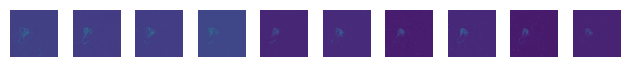

In [ ]:
tonic.utils.plot_event_grid(events, axis_array=(1, 10))

In [ ]:
transform_spike_count = TT.ToFrame(
    sensor_size=dataset.sensor_size,
    event_count=100
)

frames = transform_spike_count(events)
frames.shape

(2852, 2, 128, 128)

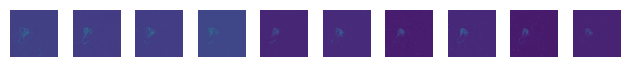

In [ ]:
tonic.utils.plot_event_grid(events, axis_array=(1, 10))

In [ ]:
transform_n_time_bins = TT.ToFrame(
    sensor_size=dataset.sensor_size,
    n_time_bins=10
)

frames = transform_n_time_bins(events)
frames.shape

(10, 2, 128, 128)

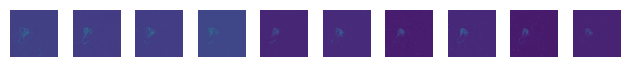

In [ ]:
tonic.utils.plot_event_grid(events, axis_array=(1, 10))

2. ToImage

In [ ]:
transform = tonic.transforms.ToImage(
    sensor_size=dataset.sensor_size,
)

image = transform(events[:1000])
image.shape

(2, 128, 128)

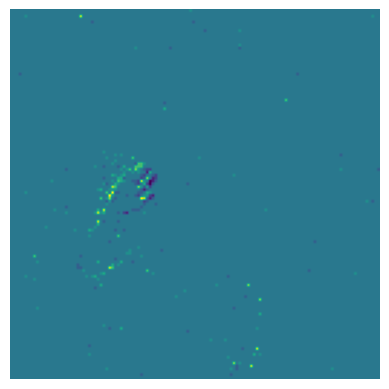

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image[1] - image[0])
plt.axis(False)
plt.show()

# Applying denoise

In [ ]:
transform_denoise = TT.Compose([
    TT.Denoise(filter_time=10000),
    transform_time_window
])

frames = transform_denoise(events)
frames.shape

(5722, 2, 128, 128)

In [ ]:
animation = tonic.utils.plot_animation(frames)
HTML(animation.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
transform_denoise_2 = TT.Compose([
    TT.Denoise(filter_time=10000),
    transform_spike_count
])

frames = transform_denoise_2(events)
frames.shape

(1788, 2, 128, 128)

In [ ]:
animation = tonic.utils.plot_animation(frames)
HTML(animation.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.